# PC 1 : Représentation des nombres en machine

**Chargement des modules python :**

In [5]:
# Ce package permet de travailler avec  diverses representations en virgule flottante
# et une arithmetique d'intervalle
# utilise a l'exercice 5
from mpmath import mp, iv

# Ce package permet de faire des sorties graphiques
# utilise a l'exercice 5
from matplotlib import pyplot as plt

# Ce package permet de travailler efficacement avec des tableaux
# utilise a l'exercice 5 
import numpy as np

## Exercice 1 : Représentation des  nombres en machine 

> Considérons une représentation en virgule flottante de nombres normalisés en binaire ([1,2])
>
> $$
\begin{aligned}
x &= (-1)^\sigma \times (1,b_1 b_2 \dots b_p)_2 \times 2^{E-B_*(E_*)}, \qquad{}  (1)\\ 
E &= (e_1 e_2 \dots e_{E_*})_2, \qquad{} B_*(E_*) = 2^{E_*-1}-1,
\end{aligned} 
$$
>
> où $p$ la taille de la mantisse et $E_*$ de l'exposant sont des entiers positifs données et les chiffres $\sigma$,  $b_i$ et $e_i$ sont $0$ ou $1$ (on travaille en binaire). 
>  
>La fonction $fl(x)$ désigne l'arrondi d'un nombre $x$ obtenu dans la représentation (1) en troncant la mantisse à $p$ chiffres significatifs.

### Question 1

Supposons $p = 52$ et $E_* = 11$. Combien de nombres différents peuvent être représentés? Quel est le plus grand nombre positif $M_{p,E_*}$ et plus petit nombre positif $m_{p,E_*}$ ?

<div class="alert alert-block alert-info">
$2^{1 + p + E_*} = 2^{64}$

**Le plus petit nombre positif**

On a $\sigma = 0$, $b_1=b_2=...=b_p=0$ et $e_1=e_2=...=e_{E_*}=0$.

Donc, $m_{p, E_*} = (-1)^0 \cdot (1,0...0)_2 \cdot 2^{0 - b_*} = 2^{-b_*}$

**Le plus grand nombre positif**

On a $\sigma  = 0$, $b_1=b_2=...=b_p=1$ et $e_1=e_2=...=e_{E_*}=1$

$M_{p, E_*} = (-1)^0 \cdot (1,1...1)_2 \cdot 2^{(11..1)_2 - b_*} = (2 - 2^{-p}) \cdot (2^{12 - b_*} - 1) $
</div>

> Il existe plusieurs définitions de l'erreur machine $\epsilon_M$ pour une représentation  de la forme (1) (avec $p$ et $E_*$ fixés). On donnera une définition formelle et une pratique. La première définition $\epsilon_M^f$, formelle, est donnée par le plus petit nombre de la forme (1) plus grand que le sup de l'erreur relative entre $x$ et son approximation $fl(x)$, i.e. 
>
> $$ e_r(x) = \left|\frac{x-fl(x)}{x}\right|, \qquad{} s = \sup\limits_{x \in [m_{p,E_*}, M_{p,E_*}]} e_r(x), \qquad\epsilon_M^f := \inf_{fl(y) \ge s} fl(y).$$
>
>La seconde définition $\epsilon_M^p$, plus pratique, est le plus petit nombre tel que $1+\epsilon_M^p$ soit différent de 1 dans la représentation (1), ce qui se réécrit 
>
>$$\epsilon_M^p := \inf_{fl(1+x)>1} x.$$

### Question 2

Évaluer $\epsilon_M^f$ et $\epsilon_M^p$ dans le cas de la question précédente et montrer qu'ils ne sont pas égaux. Comparer les.

<div class="alert alert-block alert-info">
    
**définition formelle**

On admet la répresentation suivante $\forall x \in \mathbb{R}^*$

$\quad x = (-1)^\sigma \cdot (1,b_1...b_pb_{p+1}...)_2 \cdot 2^E$

Alors $\texttt{fl}(x) = (-1)^\sigma \cdot (1,b_1...b_p)_2 \cdot 2^E \implies x - \texttt{fl}(x) = (-1)^\sigma \cdot (1,0...0b_{p+1}...)_2 \cdot 2^E$

$e_r(x) = \left| \frac{x - \texttt{fl}(x)}{x} \right| = \frac{(0,0...0b_{p+1}...)_2}{(1,b_0...b_pb_{p+1}...)_2}$

Soit $\delta = (0,0...0b_{p+1}...)_2$ et $m = (1,b_0...b_p)_2$. On a $e_r(x) = \frac{\delta}{m + \delta} = \frac{1}{\frac{m}{\delta} + 1}$, on remarque que cette fonction est croissante en $\delta$ et décroissant en $m$.

Pour le sup, on a $m = 1$ et $\delta = (0,0...0\bar{1})_2 = 2^{-p}$. Alors $s = \frac{2^{-p}}{1 + 2^{-p}}$.
    
<b> nombre plus petit répresentable $\geq s$ </b>

$2^{-p} > s$, mais on peut faire mieux. On remarque que $ s < (-1)^0 \cdot (1,1...1)_2 \cdot 2^{-(p+1)} = (2 - 2^{-p}) \cdot 2^{-(p+1)} < 2^{-p}$ 

Donc $\epsilon_M^f = (2 - 2^{-p}) \cdot 2^{-(p+1)}$

**définition pratique**

$\epsilon_M^p = m_{p,E_*} = 2^{-p}$

On remarque que $\epsilon_M^f < \epsilon_M^p$.

</div>

### Question 3
Montrer que pour $p$ et $E_*$ donnés, la représentation (1) d'un nombre $x \neq 0$ est unique. 

<div class="alert alert-block alert-info">

Supposons que $\exists x \in \mathbb{R}^*$ avec deux répresentations différentes.

$
\begin{align}
 x &= (-1)^\sigma \cdot (1,b_1...b_p)_2 \cdot 2^E \\
    &= (-1)^\mu \cdot (1,c_1...c_p)_2 \cdot 2^F
\end{align}
$
    
On remarque que $\sigma = \mu$.
    
Si $E > F$, alors $(1,0...0)_2 \cdot 2^E > (1,1...1)_2 \cdot 2^F$ car $2^{E - F} > 2^0 = 1 > 1 - 2^{-p}$. Donc, $E=F$.
    
Donc $\forall 1 \leq i \leq p$, $b_i = c_i$ par l'unicité des entiers en base 2.
    
</div>

### Question 4 
Donner un critère pour qu'un nombre $x$ n'ait pas de représentation (1) quelles que soient les tailles $p$ de la mantisse et $E_*$ de l'exposant. 
  Montrer que le nombre $(0.1)_{10}$ en base 10 n'a pas de représentation exacte en base 2 quelles que soient $p<\infty$ et $E_*<\infty$. 
  

<div class="alert alert-block alert-info">
Il faut ne pas avoir une infinité de $1$ ni une infinité de $0$ suivit par $1$.

La représentation de $(0,1)_{10}$ est cyclique $\frac{1}{10} = (0,0\overline{0011})_2$ donc on a une infinité de $1 \implies$ pas de représentation exacte.
    
</div>

## Exercice 2 : Erreur d'arrondi

Dans cet exercice le but est d'observer en théorie et en pratique la possible perte de précision lors de la soustraction de deux nombres proches en machine. 

**<big> I) PARTIE PRATIQUE </big>**
    
### Question 1

$1$. Utiliser les cellules suivantes pour évaluer la fonction :

$$f(x,y) = 9 x^4  - y^4 + 2 y^2$$

pour $x=40545$ et $y=70226$ avec différentes précisions.

In [6]:
def f(x,y):
    """ Definition de la fonction f """
    return 9*x**4-y**4+2*y**2

**Simple précision**

In [7]:
# mp.prec correspond a la taille de la mantisse (en bits) utilisee par les flottants,
# incluant le bit de poids fort.

# Une mantisee de 24 (23 + 1) bits correspond à la norme ieee 32 ("single precision")
mp.prec = 24

# mp.mpf permet de definir des flottants dont la mantisse est de taille mp.prec bits
# (potentiellement differente de celle par defaut)
x = mp.mpf('40545')
y = mp.mpf('70226')

print(f"Evaluation de la fonction pour le type flottant avec une mantisse de {mp.prec} bits")
print(f"f(x,y) = ", f(x,y))

Evaluation de la fonction pour le type flottant avec une mantisse de 24 bits
f(x,y) =  9.86338e+9


**Double précision**

Il s'agit de la précision par défaut des nombres flottants en Python.

In [8]:
# Cette formulation (avec un . a la fin) est celle par défaut pour les réels,
# c'est à dire des flottants en norme ieee 64 ("double precision")
x = 40545.
y = 70226.

print(f"Evaluation de la fonction pour le type {type(x).__name__}")
print(f"f(x,y) = ", f(x,y))

Evaluation de la fonction pour le type float
f(x,y) =  1160.0


In [9]:
# Une mantisee de 53 (52 + 1) bits correspond à la norme ieee 64 ("double precision")
mp.prec = 53
x = mp.mpf('40545')
y = mp.mpf('70226')

print(f"Evaluation de la fonction pour le type flottant avec une mantisse de {mp.prec} bits")
print(f"f(x,y) = ", f(x,y))

Evaluation de la fonction pour le type flottant avec une mantisse de 53 bits
f(x,y) =  1160.0


**Entier**

In [10]:
# Cette formulation (sans . a la fin) est celle par défaut pour les entiers
x = 40545
y = 70226

print(f"Evaluation de la fonction pour pour le type {type(x).__name__}")
print(f"f(x,y) = ", f(x,y))

Evaluation de la fonction pour pour le type int
f(x,y) =  1


**Quadruple précision**

In [11]:
# Une mantisee de 113 (112 + 1) bits correspond à la norme ieee 128 ("quadruple precision")
mp.prec = 113
x = mp.mpf('40545')
y = mp.mpf('70226')

print(f"Evaluation de la fonction pour le type flottant avec une mantisse de {mp.prec} bits")
print(f"f(x,y) = ", f(x,y))

Evaluation de la fonction pour le type flottant avec une mantisse de 113 bits
f(x,y) =  1.0


**Précision arbitraire**

In [12]:
# Vous pouvez changer la valeur de mp.prec ci-dessous (et donc la taille de la mantisse)
mp.prec = 65
x = mp.mpf('40545')
y = mp.mpf('70226')

print(f"Evaluation de la fonction pour le type flottant avec une mantisse de {mp.prec} bits")
print(f"f(x,y) = {f(x,y)}")

Evaluation de la fonction pour le type flottant avec une mantisse de 65 bits
f(x,y) = 1.0


$2$. Quelle est la valeur exacte ? Expliquer les différences observées entre les résultats obtenus avec les différents types. Quelle opération est la source des erreurs observées?


<div class="alert alert-block alert-info">
    
La valeur exacte c'est $1$. 
    
Le calcul le plus précise c'est avec des entiers (c'est exacte).

La source des erreurs c'est la substraction, à cause de la taille finie de la mantisse on perde de la précision.
</div>

### Question 2

Trouvez une écriture équivalente de l'expression $f(x,y)$ pour que son évaluation avec les différents types précédents renvoie des résultats similaires (à une erreur inférieur à $10^{-6}$ près). 

In [26]:
def f2(x,y):
    """ Definition de la fonction f avec une autre formulation """
    return (3*x**2 - y**2)*(3*x**2 + y**2) + 2*y**2

In [27]:
# Cette precision mp.prec (taille de la mantisse en bits) correspond à la norme ieee 32
mp.prec = 24
x = mp.mpf('40545')
y = mp.mpf('70226')
print(f"Evaluation de la fonction pour le type flottant avec une mantisse de {mp.prec} bits")
print(f"f(x,y) = ", f2(x,y))

# Cette precision mp.prec (taille de la mantisse en bits) correspond à la norme ieee 64
mp.prec = 53
x = mp.mpf('40545')
y = mp.mpf('70226')
print(f"Evaluation de la fonction pour le type flottant avec une mantisse de {mp.prec} bits")
print(f"f(x,y) = ", f2(x,y))

# Cette precision mp.prec (taille de la mantisse en bits) correspond à la norme ieee 128
mp.prec = 113
x = mp.mpf('40545')
y = mp.mpf('70226')
print(f"Evaluation de la fonction pour le type flottant avec une mantisse de {mp.prec} bits")
print(f"f(x,y) = ", f2(x,y))

# Cette formulation correspond a des entiers
x = 40545
y = 70226
print(f"Evaluation de la fonction pour pour le type {type(x).__name__}")
print(f"f(x,y) = ", f2(x,y))

Evaluation de la fonction pour le type flottant avec une mantisse de 24 bits
f(x,y) =  5.05992e+12
Evaluation de la fonction pour le type flottant avec une mantisse de 53 bits
f(x,y) =  1.0
Evaluation de la fonction pour le type flottant avec une mantisse de 113 bits
f(x,y) =  1.0
Evaluation de la fonction pour pour le type int
f(x,y) =  1


<div class="alert alert-block alert-info">
Quand on factorise, on fait la substraction avec des nombres moins grands. On remarque qu'on arrive à la bonne réponse avec double précision.
</div>

### Question 3 

 De même, proposer et tester sur le notebook une écriture équivalente pour diminuer l'erreur commise pour l'évaluation des expressions ci-dessous :
- $g_1(x) = \sqrt{x^4+4} -2$ autour de $x=0$, 
- $g_2(x) = \cos(x)-1$ autour de $x=0$, 
- les racines du polynôme $x^2 + 10^{8}x + 1$.

In [30]:
def g1(x):
    """ Definition de la fonction g1 """
    return (x**4)/(np.sqrt(x**4) + 2)

def g2(x):
    """ Definition de la fonction g2 """
    return -2*np.sin(x/2)**2

def g3(x):
    """ Definition de la fonction g3 (valeurs des racines du polynome)s"""
    return 

x = 1.e-6; f = g1
print(f"Evaluation en {x} de g1 : {f(x)}")

x = 1.e-6; f = g2
print(f"Evaluation en {x} de g2 : {f(x)}")

x = 1.e-6; f = g3
print(f"Evaluation en {x} de g3 : {f(x)}")

Evaluation en 1e-06 de g1 : 4.999999999997498e-25
Evaluation en 1e-06 de g2 : -4.999999999999583e-13
Evaluation en 1e-06 de g3 : None


<div class="alert alert-block alert-info">
$g_1(x) = (\sqrt{x^4 + 4} - 2) \cdot \frac{\sqrt{x^4 + 4} + 2}{\sqrt{x^4 + 4} + 2} = \frac{x^4}{\sqrt{x^4 + 4} + 2}$

$\cos(\frac{x}{2} + \frac{x}{2}) = 1 - 2\sin^2(\frac{x}{2}) \implies g_2(x) = -2\sin^2(\frac{x}{2})$

Dans les deux cas, on élimine la substraction qui cause des problèmes.
</div>

**<big> II) PARTIE THÉORIQUE </big>**

### Question 4 

$1$. Soient $x>y$ deux réels positifs tels que

$$ \frac{fl(x) - fl(y)}{fl(x)} \le 2^{-m},$$
    
avec $m \ge 1$ entier. Montrer que le calcul de la différence $fl(fl(x)-fl(y))$ fait perdre au moins $m$ chiffres significatifs en base $2$: les $m$ dernières valeurs dans la mantisse de $fl(fl(x)-fl(y))$ ne correspondent pas forcément aux valeurs *théoriques* pour $x-y$.

$2$. De même, si 

$$ 2^{-n} \le \frac{fl(x) - fl(y)}{fl(x)}, $$

avec $n \ge 1$ entier, alors le calcul de la différence $fl(fl(x)-fl(y))$ fait perdre au plus $n$ chiffres significatifs en base $2$.

<i>Remarque</i> : Ces résultats se généralisent dans d'autres bases que la base 2.

### Question 5 

Utiliser le point précédent pour donner une borne inférieur sur $|x|$ afin de perdre au plus $m$ chiffres binaires significatifs lors du calcul de $f(x)=\sqrt{x^2+1}-1$.

**<big> III) ILLUSTRATION </big>**

### Question 6 

Définissons la suite : 

$$
\left\{
\begin{aligned}
u_0 &= \frac{1}{10} \\
u_{n+1} &= 11 u_n - 1, \qquad\forall~n\in\mathbb{N}^*.
\end{aligned}
\right.
$$

$1$. Donner une formule analytique pour $u_n$ pour tout $n$. 

$2$. Évaluer les 20 premières valeurs de cette suite en simple (mp.prec=24) et double (mp.prec=53) précision.

In [16]:
# Nombre d'iterations
N_loop = 20

# On fixe la taille de la mantisse en bits
mp.prec = 24
# On initialise ui a la valeur 0.1 avec cette precision
ui = mp.mpf('0.1')
print("en simple précision:")
for i in range(1,N_loop+1):
    # A chaque iteration, ui est reevalue et sa valeur est donnee a l'ecran
    ui = 11.*ui - 1.
    print(f"   i = {i:2d} --> ui = {ui}")  
    
    
# On fixe la taille de la mantisse en bits
mp.prec = 53
# On initialise ui a la valeur 0.1 avec cette precision
ui = mp.mpf('0.1')
print("\n en double précision:")
for i in range(1, N_loop+1):    
    # A chaque iteration, ui est reevalue et sa valeur est donnee a l'ecran
    ui = 11.*ui - 1.
    print(f"   i = {i:2d} --> ui = {ui}")  

en simple précision:
   i =  1 --> ui = 0.1
   i =  2 --> ui = 0.1
   i =  3 --> ui = 0.100003
   i =  4 --> ui = 0.100032
   i =  5 --> ui = 0.100349
   i =  6 --> ui = 0.10384
   i =  7 --> ui = 0.142237
   i =  8 --> ui = 0.56461
   i =  9 --> ui = 5.21071
   i = 10 --> ui = 56.3179
   i = 11 --> ui = 618.496
   i = 12 --> ui = 6802.46
   i = 13 --> ui = 74826.1
   i = 14 --> ui = 823086.0
   i = 15 --> ui = 9.05394e+6
   i = 16 --> ui = 9.95934e+7
   i = 17 --> ui = 1.09553e+9
   i = 18 --> ui = 1.20508e+10
   i = 19 --> ui = 1.32559e+11
   i = 20 --> ui = 1.45815e+12

 en double précision:
   i =  1 --> ui = 0.1
   i =  2 --> ui = 0.100000000000001
   i =  3 --> ui = 0.100000000000011
   i =  4 --> ui = 0.100000000000118
   i =  5 --> ui = 0.1000000000013
   i =  6 --> ui = 0.100000000014304
   i =  7 --> ui = 0.100000000157346
   i =  8 --> ui = 0.100000001730808
   i =  9 --> ui = 0.100000019038893
   i = 10 --> ui = 0.100000209427825
   i = 11 --> ui = 0.100002303706079
   i = 

$3$. Expliquer ce phénomène. Quelle précision perd-on à chaque itération?

$4$. Il peut paraitre surprenant, voir inquiétant, que quelle que soit la précision le résultat numérique finisse par être radicalement différent de la solution théorique. Etudier le comportement de la suite $(u_n)$ pour $u_0\neq 1/10$ et tempérer l'observation ci-dessus.

## Exercice 3 : Stabilité et conditionnement

On rappel les définitions suivantes pour l'évaluation du scalaire $\mathcal{P}(x)$ (a priori non nul).
Dans la suite $0<\epsilon$ est arbitrairement petit.

- Le conditionnement du problème d'évaluer $\mathcal{P}(x)$ est le plus petit scalaire $\kappa$ d'amplification de l'erreur relative sur le résultat

    $$ \frac{|\hat{x}_i-x_i|}{|x_i|} \le \epsilon \quad\text{pour tout $i$} \quad \Rightarrow \quad \frac{|\mathcal{P}(\hat{x})-\mathcal{P}(x)|}{|\mathcal{P}(x)|} \le \kappa \epsilon. $$

    Un problème est bien conditionné si $\kappa$ est petit. 

- Considérant un algorithme $\hat{\mathcal{P}}(x)$ qui approche $\mathcal{P}(x)$, sa constante de stabilité inverse est le plus petit scalaire $C$ d'amplification de l'erreur sur la donnée, i.e.

    $$ \exists \hat{x}\quad \text{satisfaisant} \quad \mathcal{P}(\hat{x}) = \hat{\mathcal{P}}(x) \quad \text{tel que}\quad \frac{|\hat{x}_i-x_i|}{|x_i|} \le  C \epsilon_M \quad \text{pour tout $i$}. $$

    Un algorithme est stable si $C$ est petit.

### Question 1

Montrer que 
- $\hat{f}(x_1,x_2) = fl\left(fl(x_1) fl(x_2)\right)$ est stable au sens inverse pour $f(x_1,x_2) = x_1 x_2$
- $\hat{f}(x_1,x_2) = fl\left(fl(x_1) + fl(x_2)\right)$ est stable au sens inverse pour $f(x_1,x_2) = x_1 + x_2$
- $\hat{f}(x) = fl\left(fl(x)+1\right)$ n'est pas stable au sens inverse pour $f(x)=x+1$
- $\hat{f}(x_1,x_2) = fl\left(fl(x_1) / fl(x_2)\right)$ est stable au sens inverse pour $f(x)=x_1/x_2$

### Question 2

On revient dans cet question sur la fonction $f(x,y) = 9 x^4  - y^4 + 2 y^2$ de l'exercice 2, et en particulier sur son comportement pour $(x,y)=(40545,70226)$.

$1$. Montrer que $f$ est stable au sens inverse en $(x,y)=(40545,70226)$.

*Indications :* on pourra chercher $\hat{x}$ tel que $f(\hat{x},y)$ soit égal à la valeur inexacte de $f(x,y)$ obtenue plus haut, et majorer $\vert \hat{x} - x\vert$.

$2$. Montrer que le conditionnement est très mauvais en $(x,y)=(40545,70226)$, mais qu'il est bon dès qu'on s'éloigne légèrement de ce point. Faire le lien avec les différents comportements des deux formules utilisées pour évaluer $f$ dans l'exercice 2.

### Question 3 

On étudie le problème de calculer $x$ et $y$ tels que 

$$A \left(\begin{array}{c} x \\ y \end{array}\right) = b$$

avec

- a) $A = \left( \begin{array}{cc} 1+\alpha & -1 \\ 1 & -1 \end{array}\right)$ et $b = \left(\begin{array}{c} \alpha \\ 0 \end{array}\right)$, 
- b) $A = \left( \begin{array}{cc}   \alpha &  1 \\ 1 &  1 \end{array}\right)$ et $b = \left(\begin{array}{c} 1 \\ 2 \end{array}\right)$.

$1$. Calculer les valeurs exactes de $x$ et $y$ en fonction des paramètres dans chaque cas.

$2$. Proposer une estimation du conditionnement dans le cas a). *On supposera que les nombres $1$, $0$ et $-1$ sont représentables exactement et que les seules erreurs commises sont celles sur $(1+\alpha)$ dans la matrice et sur $\alpha$ dans le vecteur, et que ces deux erreurs sont indépendantes.*

$3$. Proposer une estimation de conditionnement dans le cas b). *On supposera que les nombres $1$ et $2$ sont représentables exactement et que la seule erreur commise est celle sur $\alpha$ dans la matrice.*

> On verra plus tard une autre notion (beaucoup plus courante) de conditionnement de matrices. Cette notion de conditionnement de matrice est bien obtenue à partir de la notion de conditionnement décrite ici, mais nécessite une étude un peu plus approfondie.  

$4$. On utilise désormais l'algorithme d'élimination de Gauss sans pivot pour évaluer la solution $(x,y)$ du problème b). Proposer une estimation de la constante de stabilité inverse. *On remarquera que les nombres $1$ et $2$ sont représentable exactement en machine et seul $\alpha$ peut être inexacte.*

$5$. On utilise désormais l'algorithme d'élimination de Gauss avec pivot (on commence par intervertir les deux lignes) pour évaluer la solution $(x,y)$ du problème b). Proposer une estimation de la constante de stabilité inverse.

### Question 4 

On reviens sur le calcul de $K = \frac{1}{x(1+x)}$ en $x=10^4$.

$1$. Proposer une constante de conditionnement pour ce problème.

$2$. On évalue $K$ en effectuant les calculs 

$$ c_1 = 1-x, \quad c_2 = x \times c_1, \quad K = \frac{1}{c_2}.$$

Proposer une constante de stabilité backward pour cet algorithme.

$3$. On évalue $K$ en effectuant les calculs

$$ c_1 = 1-x, \quad c_2 = \frac{1}{x}, \quad c_3 = \frac{1}{c_1}, \quad K = c_2-c_3.$$

Proposer une constante de stabilité backward pour cet algorithme.

---

## Exercice 4 : Arithmétique d'intervalles

L'arithmétique d'intervalles (ou arithmétique par intervalles) est, comme son nom l'indique, une arithmétique sur des intervalles (de flottants) plutôt que sur des flottants.  

**Construction de l'arithmétique d'intervalles et premiers exemples**

> Habituellement, lorsqu'on fait des calculs sur ordinateur on approche des nombres réels par des nombres flottants, c'est à dire qu'on remplace $x\in\mathbb{R}$ par $fl(x)$. Dans cet exercice, les objets de base ne seront pas de simples nombres flottants, mais des intervalles dits *représentables*, c'est à dire de la forme $I = [x^-,x^+]$ où $x^-$ et $x^+$ sont des flottants. Dans ce contexte, on remplace un nombre réel par un intervalle représentable : 
>
>$$ I_x = \left[\nabla(x),\Delta(x)\right], $$
>
>qui, par définition des arrondis dirigés vers plus et moins l'infini, contient le nombre réel $x$.

In [17]:
# Un exemple de définition d'un intervalle représentable, pour approcher 0.1, à l'aide de la commande iv.mpf.
# Prendre garde au fait que, si x n'est pas un flottant, iv.mpf(x) construit l'intervalle représentant fl(x). 
# Afin d'obtenir l'intervalle I_x défini ci-dessus, il faut utiliser iv.mpf('x').

I0x = iv.mpf(0.125) # 0.125 = 2^{-4} est exactement représentable en base 2, pas de problème
print("L'intervalle I0x est", I0x)

I1x = iv.mpf(0.1)   # 0.1 n'est pas exactement représentable en base 2, c'est fl(0.1) qui est utilisé ici
print("L'intervalle I1x est", I1x)

I2x = iv.mpf(1)/iv.mpf(10) # La bonne manière de définir I_{0.1} pour que l'intervalle contienne bien 0.1
print("L'intervalle I2x est", I2x)

I3x = iv.mpf('0.1')        # On peut aussi utiliser une chaine de caractères pour obtenir le même résultat
print("L'intervalle I3x est", I3x)

L'intervalle I0x est [0.125, 0.125]
L'intervalle I1x est [0.10000000000000000555, 0.10000000000000000555]
L'intervalle I2x est [0.099999999999999991673, 0.10000000000000000555]
L'intervalle I3x est [0.099999999999999991673, 0.10000000000000000555]


> Afin de pouvoir faire des calculs avec cette nouvelle représentation, il faut d'abord reconstruire les opérations de bases. On considère deux intervalles représentables $I = [x^-,x^+]$ et $J=[y^-,y^+]$. On définit les opérations $\oplus$, $\ominus$, $\otimes$ et $\oslash$ entre intervalles représentables de la manière suivante :
> - $I \oplus J$ est le plus petit intervalle représentable tel que, pour tout $x\in I$ et $y\in J$, $x+y \in I \oplus J$,
> - $I \ominus J$ est le plus petit intervalle représentable tel que, pour tout $x\in I$ et $y\in J$, $x-y \in I \ominus J$,
> - $I \otimes J$ est le plus petit intervalle représentable tel que, pour tout $x\in I$ et $y\in J$, $x\times y \in I \otimes J$, 
> - $I \oslash J$ est le plus petit intervalle représentable tel que, pour tout $x\in I$ et $y\in J$, $x\div y \in I \oslash J$.

### Question 1 

A l'aide des opérations d'arrondis dirigés vers plus et moins l'infini ($\Delta$ et $\nabla$), déterminer les ensembles $I \oplus J$, $I \ominus J$, $I \otimes J$ et $I \oslash J$ en fonction de $x^-$, $x^+$, $y^-$ et $y^+$. 

*Indications :* pour la multiplication et la division, on pourra commencer par décomposer tout intervalle comme l'union d'un intervalle positif et d'un négatif (éventuellement vide). 

*Remarques :* afin de pouvoir gérer les under/overflows et les divisions par $0$, on inclut $\pm\infty$ à la listes de valeurs que peuvent prendre les extrémités d'un intervalle représentable. Ainsi, si $x$ et $y$ sont des flottants tels que $x+y$ est plus grand que le plus grand nombre flottant, on défnit $[0,x] \oplus [0,y] = [0,+\infty]$. La librairie mpmath permet d'effectuer de telles opérations sur les ensembles représentables.

In [18]:
# Declaration des intervalles I et J à l'aide de la commande iv.mpf
I = iv.mpf([-1, 1])
J = iv.mpf([ 1, 3])

# Quelques exemples d'opérations élémentaires sur les intervalles
print(f"I   =", I)
print(f"J   =", J)
print(f"I+J =", I+J)
print(f"I-J =", I-J)
print(f"I*J =", I*J)
print(f"I/J =", I/J)

I   = [-1.0, 1.0]
J   = [1.0, 3.0]
I+J = [0.0, 4.0]
I-J = [-4.0, 0.0]
I*J = [-3.0, 3.0]
I/J = [-1.0, 1.0]


### Question 2 

- Évaluer avec Python la fonction $h(x) = x^2-x$ en $I = [0,2]$. 
- Utiliser ensuite les formules équivalentes $h(x) = x(x-1)$, puis $h(x) = \left(x-\frac{1}{2}\right)^2 -\frac{1}{4}$.
- Quelle est l'image de $[0,2]$ par $h$? Commenter par rapport aux intervalles obtenus avec les différentes formules.

In [19]:
I = iv.mpf([0, 2])
print(f"I =", I)

def pol1(x):
    """ 1e definition du polynome """
    return x**2-x
    
def pol2(x):
    """ 2e definition du polynome """
    return 
    
def pol3(x):
    """ 3e definition du polynome """
    return 
    
print(f"1e evaluation de h(I) : ", pol1(I))
print(f"2e evaluation de h(I) : ", pol2(I))
print(f"3e evaluation de h(I) : ", pol3(I))

I = [0.0, 2.0]
1e evaluation de h(I) :  [-2.0, 4.0]
2e evaluation de h(I) :  None
3e evaluation de h(I) :  None


> De manière plus générale, étant donnée une fonction $f:\mathbb{R}\to\mathbb{R}$ et un intervalle représentable $I = [x^-,x^+]$, on veut pouvoir calculer un interval représentable, qu'on notera $f(I)$, et qui contient $\{f(x),\ x\in I\}$. On notera qu'un tel intervalle n'est pas unique, dans la pratique on cherche à ce qu'il soit le plus petit possible.

### Question 3 

Décrire de manière succincte (sans l'implémenter) une procédure permettant de calculer $\exp(I)$.

*Indications :* on pourra commencer par déterminer un encadrement de $\exp(x)$ pour un flottant négatif $x$, puis pour un flottant $x$ de signe quelconque.

*Remarques :* la plupart des librairies dédiées à l'aritmétiques d'intervalles incluent une implémentation de telles procédures pour les fonctions *usuelles* telles que exp, cos, sin, etc. D'autre part, on remarquera que la définition ci-dessus est *compatible* avec la composition : si pour deux fonctions $f$ et $g$ on sait calculer $f(I)$ et $g(I)$ pour tout intervalle représentable $I$, on peut facilement obtenir $(f\circ g)(I)$ en calculant succesivement $J=g(I)$ qui par définition est un intervalle représentable, puis $(f\circ g)(I) = f(J)$.

In [20]:
I = iv.mpf([-1, 1])
print(f"Un interval représentable contenant l'image de [-1,1] par exp : \n", iv.exp(I), "\n")
print(f"Un interval représentable contenant l'image de [-1,1] par exp o sin : \n", iv.exp(iv.sin(I)))

Un interval représentable contenant l'image de [-1,1] par exp : 
 [0.36787944117144227851, 2.7182818284590455349] 

Un interval représentable contenant l'image de [-1,1] par exp o sin : 
 [0.43107595064559223186, 2.3197768247158534471]


**Application au contrôle de l'erreur du calcul sur flottants**

> Des erreurs de troncature sont commises lors de chaque calcul en virgule flottante. Elles sont généralement négligeables, mais pas toujours (voir exercices 2 et 3). L'arithmétique d'intervalles permet d'obtenir des bornes sur ces erreurs. Au lieu de remplacer $x\in\mathbb{R}$ par son approximation en virgule flottante $fl(x)$, on le remplace par l'intervalle représentable $I_x = \left[\nabla(x),\Delta(x)\right]$ qui, par définition des arrondis dirigés vers plus et moins l'infini, contient le nombre réel $x$. Puis, on effectue des opération sur l'intervalle $I$ plutôt que sur $fl(x)$, et les propriétés de l'aritmétique par intervalle nous permettent d'affirmer que l'intervalle final contient la quantité recherchée!

In [21]:
# Calcul en flottant : on initialise a 
a = 0.1
# on test si 3*a = 0.3 (ici "a==b" renvoie le booleen True si a=b ou False sinon)
print(f"L'egalite 3*a=0.3 est ",3*a==0.3)
print(f"A cause des erreurs d'arrondi, on n'a pas exactement 3a=0.3.\n")

# Calcul avec des intervalles : on initialise Ia 
Ia = iv.mpf('0.1')
print(f"L'intervalle 3*Ia = ",3*Ia)
print(f"Lorsqu'on remplace 0.1 par l'intervalle representable associé Ia et qu'on calcule 3*Ia, \n\
on obtient bien un intervalle qui contient 0.3")

L'egalite 3*a=0.3 est  False
A cause des erreurs d'arrondi, on n'a pas exactement 3a=0.3.

L'intervalle 3*Ia =  [0.29999999999999993339, 0.30000000000000004441]
Lorsqu'on remplace 0.1 par l'intervalle representable associé Ia et qu'on calcule 3*Ia, 
on obtient bien un intervalle qui contient 0.3


### Question 4 

Évaluer avec Python la fonction de l'exercice 2 

$$f(x,y) = 9 x^4  - y^4 + 2 y^2$$ 

toujours pour $x=40545$ et $y=70226$, avec les deux formulations introduites dans l'exercice 2, mais en remplacant $(x,y)$ par $(I_x,I_y)$. Commentez les différents résultats obtenus.

In [22]:
# initialisation de x, y et des intervalles Ix et Iy associes
x = 40545.
y = 70226.
Ix = iv.mpf(x)
Iy = iv.mpf(y)

**Un exemple simple de preuve assistée par ordinateur utilisant l'arithmétique d'intervalles**

On considère la fonction $g:\mathbb{R}\to\mathbb{R}$ définie par 

$$ g(x) = \exp(\sin(20x)) + x^4 +\frac{x}{1+x^2} -\frac{4}{100}. $$

On chercher à démontrer l'affirmation suivante : $g(x)>0$ pour tout $x\in\mathbb{R}$.

### Question 5 
Tracer $g$ sur $[-2,2]$.


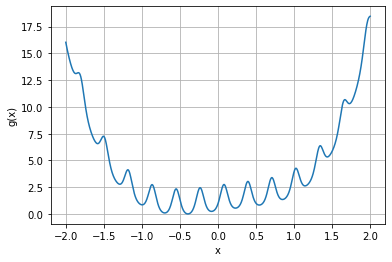

In [23]:
def g(x):
    """ Definition de la fonction g """
    return np.exp(np.sin(20*x)) + x**4 + x/(1.+x**2) - 4./100.

# creation des donnees pour la sortie graphique
grid   = np.linspace(-2,2,1000)
values = g(grid) 

# sortie graphique :
# creation d'une figure
fig = plt.figure()
# trace la figure reliant les points dont les abscisses sont stockees dans grid et les ordonnees dans values
plt.plot(grid, values)
# nom de l'axe des abscisses
plt.xlabel('x')
# nom de l'axe des ordonnees
plt.ylabel('g(x)')
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig)

### Question 6

$1$. Déterminer explicitement un flottant $M>1$ tel que $g(x)>0$ pour tout $\vert x\vert >M$.

*Indications :* on pourra commencer par minorer $\exp(\sin(20x))$ et $\frac{x}{1+x^2}$.

$2$. Obtenir un encadrement de $g$ sur $[-M,M]$ en utilisant l'arithmétique d'intervalle. Peut-on directement conclure? 

In [24]:
def ig(x):
    """ Definition de la fonction g utilisant les fonctions de bases sur les intervalles """
    return iv.exp(iv.sin(20*x)) + x**4 + x/(1.+x**2) - 4./100.

In [25]:
M = 0 #à modifier
I = iv.mpf([-M,M])
print(ig(I))

[0.95999999999999996447, 0.9600000000000000755]


$3$. Découper $[-M,M]$ en plusieurs sous-intervalles, et obtenir un encadrement de $g$ sur chacun d'entre eux en utilisant l'arithmétique d'intervalles. Répéter cette procédure jusqu'à obtenir la preuve que $g$ reste strictement positif sur $[-M,M]$.

## Références 

[1] IEEE standard for floating-point arithmetic. IEEE Std 754-2008, pages 1–70, Aug 2008.

[2] W. Tucker. Validated numerics. Princeton University Press, Princeton, NJ, 2011. A short introduction to rigorous computations.

[3] R. Moore. Interval analysis (Vol. 4). Englewood Cliffs: Prentice-Hall, 1966.